In [2]:
import pandas as pd

df = pd.read_csv("menu.csv")

print("shape of the dataset:", df.shape)
print("\nColumn names:", df.columns.tolist())
print("\nFirst 5 rows:")
print(df.head())

print("\nMissing values per column:")
print(df.isnull().sum())

shape of the dataset: (260, 24)

Column names: ['Category', 'Item', 'Serving Size', 'Calories', 'Calories from Fat', 'Total Fat', 'Total Fat (% Daily Value)', 'Saturated Fat', 'Saturated Fat (% Daily Value)', 'Trans Fat', 'Cholesterol', 'Cholesterol (% Daily Value)', 'Sodium', 'Sodium (% Daily Value)', 'Carbohydrates', 'Carbohydrates (% Daily Value)', 'Dietary Fiber', 'Dietary Fiber (% Daily Value)', 'Sugars', 'Protein', 'Vitamin A (% Daily Value)', 'Vitamin C (% Daily Value)', 'Calcium (% Daily Value)', 'Iron (% Daily Value)']

First 5 rows:
    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       40

In [17]:
df.dropna(inplace=True)

print(df.describe())
print("Carbs mean:", df['Carbohydrates'].mean())
print("Most sold Product:", df['Item'].mode()[0])


          Calories  Calories from Fat   Total Fat  Total Fat (% Daily Value)  \
count   260.000000         260.000000  260.000000                 260.000000   
mean    368.269231         127.096154   14.165385                  21.815385   
std     240.269886         127.875914   14.205998                  21.885199   
min       0.000000           0.000000    0.000000                   0.000000   
25%     210.000000          20.000000    2.375000                   3.750000   
50%     340.000000         100.000000   11.000000                  17.000000   
75%     500.000000         200.000000   22.250000                  35.000000   
max    1880.000000        1060.000000  118.000000                 182.000000   

       Saturated Fat  Saturated Fat (% Daily Value)   Trans Fat  Cholesterol  \
count     260.000000                     260.000000  260.000000   260.000000   
mean        6.007692                      29.965385    0.203846    54.942308   
std         5.321873                   

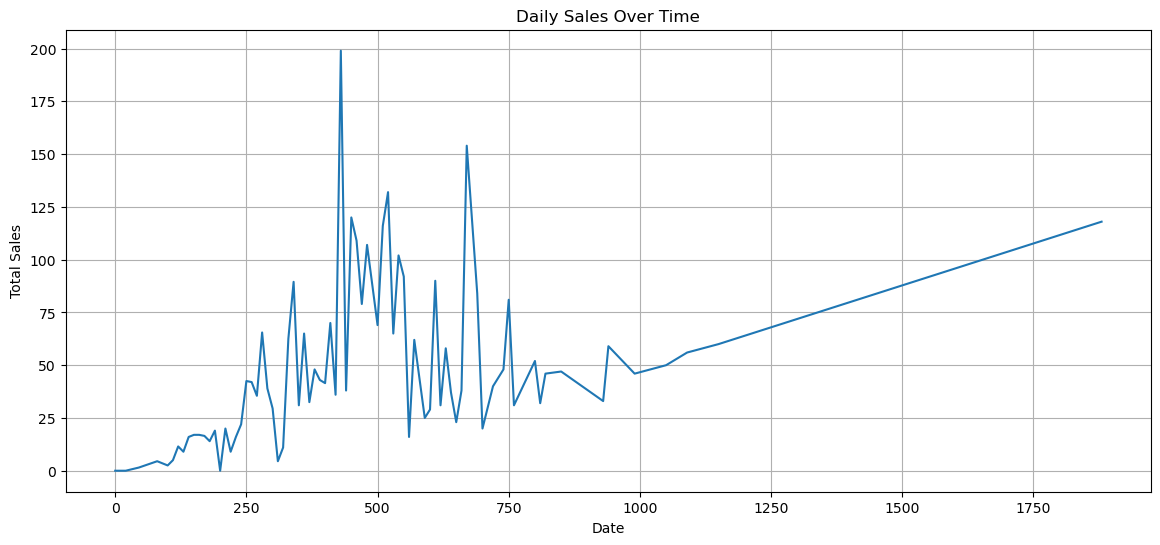

In [21]:
# Group by date and visualize sales trend
daily_sales = df.groupby('Calories')['Total Fat'].sum()

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(14,6))
daily_sales.plot()
plt.title('Daily Sales Over Time')
plt.ylabel('Total Sales')
plt.xlabel('Date')
plt.grid(True)
plt.show()


C:\Users\Yash Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


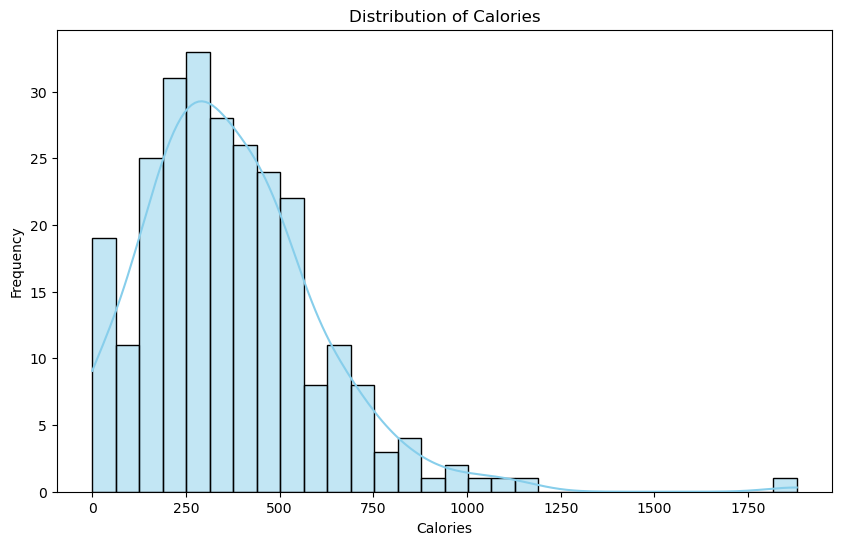

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(df["Calories"].dropna(), bins=30, kde=True, color='skyblue')
plt.title("Distribution of Calories")
plt.xlabel("Calories")
plt.ylabel("Frequency")
plt.show()


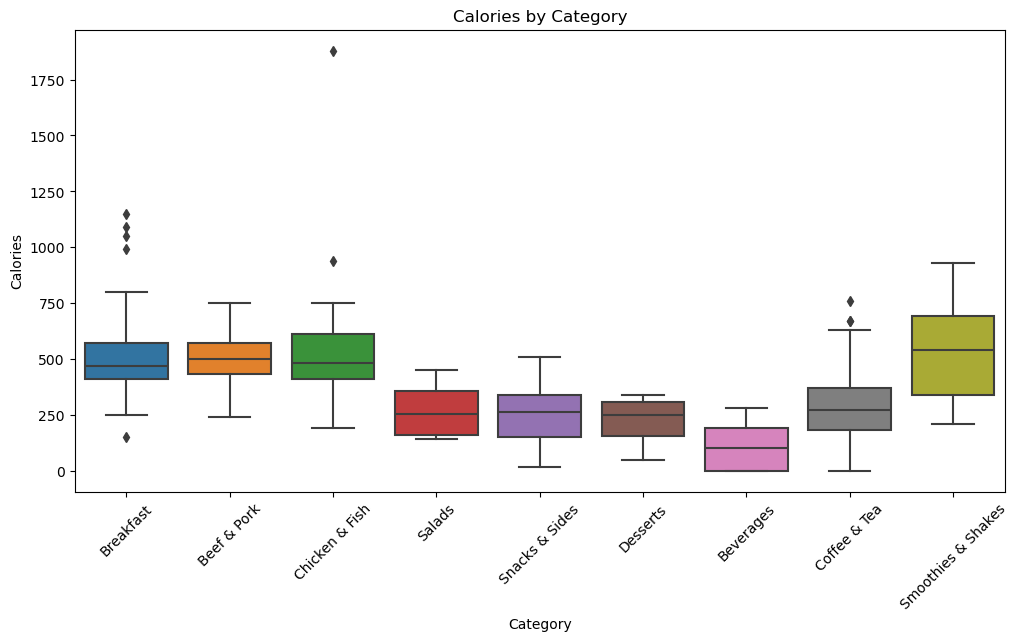

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x="Category", y="Calories", data=df)
plt.xticks(rotation=45)
plt.title("Calories by Category")
plt.show()


In [25]:
print("Unique Categories:", df["Category"].nunique())
print("Items per Category:\n", df["Category"].value_counts())
print("Unique Items:", df["Item"].nunique())


Unique Categories: 9
Items per Category:
 Category
Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: count, dtype: int64
Unique Items: 260


In [26]:
missing = df.isnull().mean() * 100
print(missing[missing > 0])


Series([], dtype: float64)


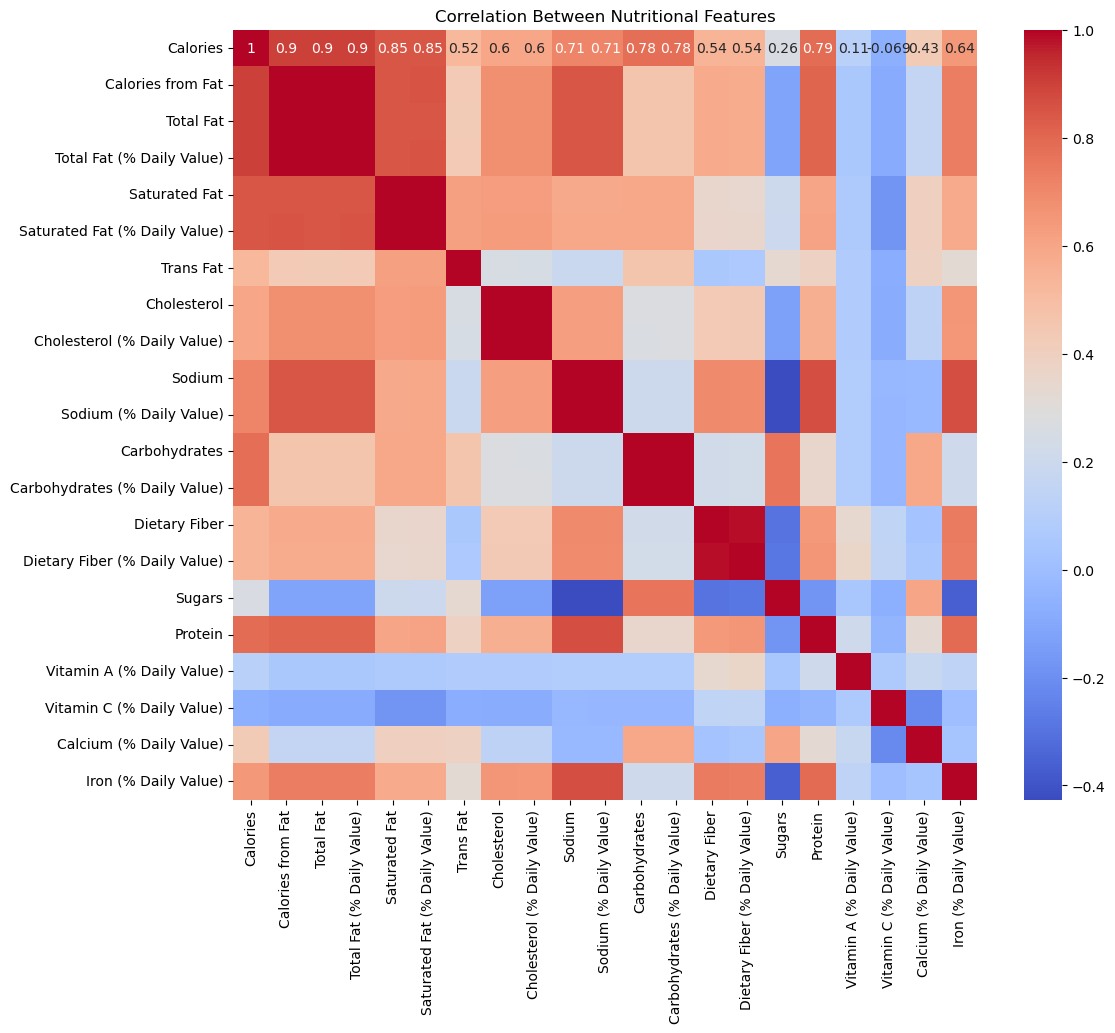

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

num_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12,10))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Between Nutritional Features")
plt.show()


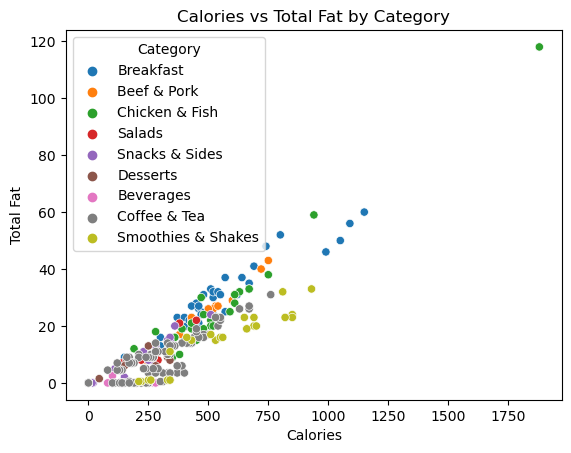

In [28]:
sns.scatterplot(x="Calories", y="Total Fat", data=df, hue="Category")
plt.title("Calories vs Total Fat by Category")
plt.show()


Category
Chicken & Fish        552.962963
Smoothies & Shakes    531.428571
Breakfast             526.666667
Beef & Pork           494.000000
Coffee & Tea          283.894737
Salads                270.000000
Snacks & Sides        245.769231
Desserts              222.142857
Beverages             113.703704
Name: Calories, dtype: float64


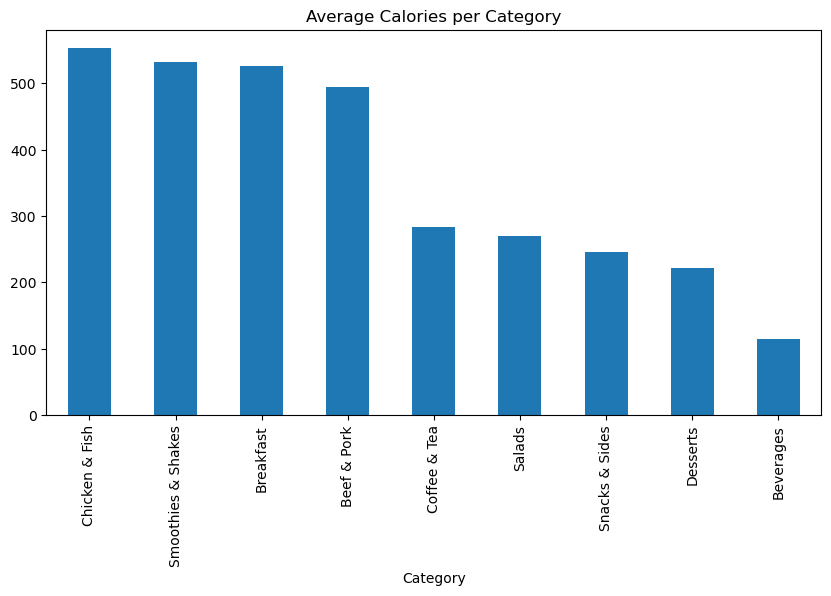

In [29]:
avg_cal = df.groupby("Category")["Calories"].mean().sort_values(ascending=False)
print(avg_cal)

avg_cal.plot(kind="bar", figsize=(10,5), title="Average Calories per Category")
plt.show()


C:\Users\Yash Raj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


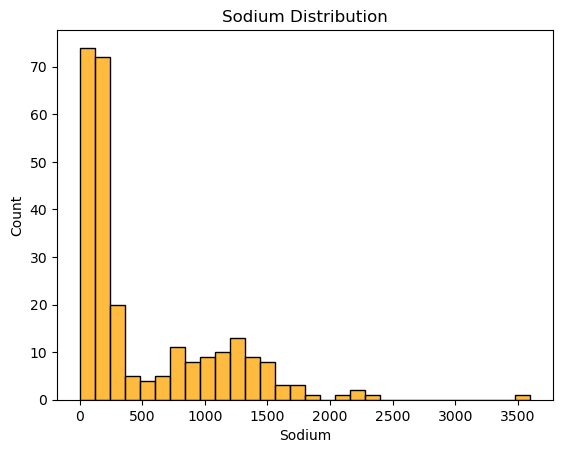

In [30]:
sns.histplot(df["Sodium"].dropna(), bins=30, color='orange')
plt.title("Sodium Distribution")
plt.show()


In [31]:
high_sodium = df[df["Sodium (% Daily Value)"] > 100]
print("Items exceeding daily sodium limit:")
print(high_sodium[["Item", "Sodium", "Sodium (% Daily Value)"]])


Items exceeding daily sodium limit:
                            Item  Sodium  Sodium (% Daily Value)
82  Chicken McNuggets (40 piece)    3600                     150


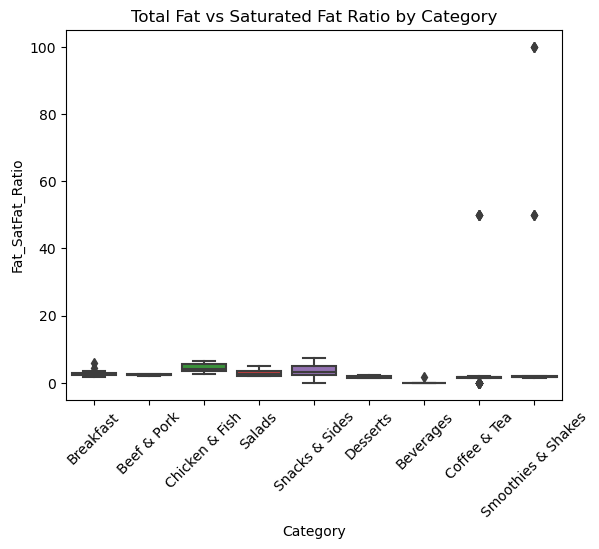

In [32]:
df["Fat_SatFat_Ratio"] = df["Total Fat"] / (df["Saturated Fat"] + 0.01)

sns.boxplot(x="Category", y="Fat_SatFat_Ratio", data=df)
plt.xticks(rotation=45)
plt.title("Total Fat vs Saturated Fat Ratio by Category")
plt.show()


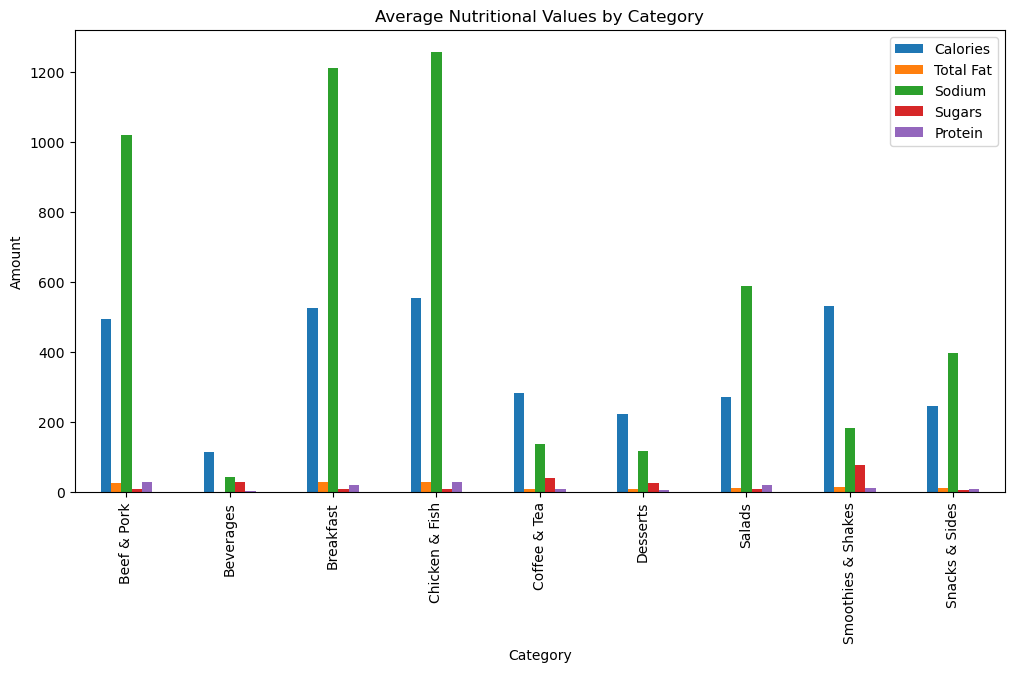

In [33]:
nutrients = ["Calories", "Total Fat", "Sodium", "Sugars", "Protein"]
cat_avg = df.groupby("Category")[nutrients].mean()

cat_avg.plot(kind="bar", figsize=(12,6))
plt.title("Average Nutritional Values by Category")
plt.ylabel("Amount")
plt.show()


In [34]:
df.to_csv("menu_cleaned.csv",index=False)
